In [105]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [106]:
# Load the Iris dataset
df = pd.read_csv("./datasets/iris.csv")


In [107]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [108]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [109]:
# Drop the 'Id' and 'Species' columns as they are not required for clustering
df = df.drop(columns=['Id', 'Species'])


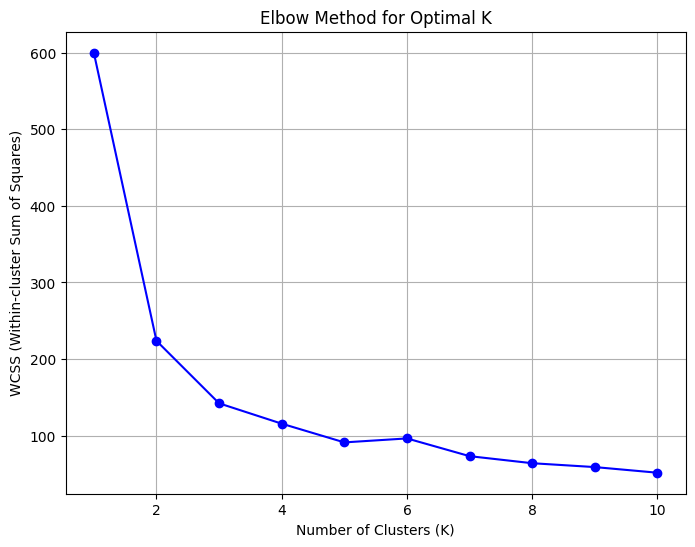

In [110]:
# Plot the Elbow Curve to find the optimal K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()


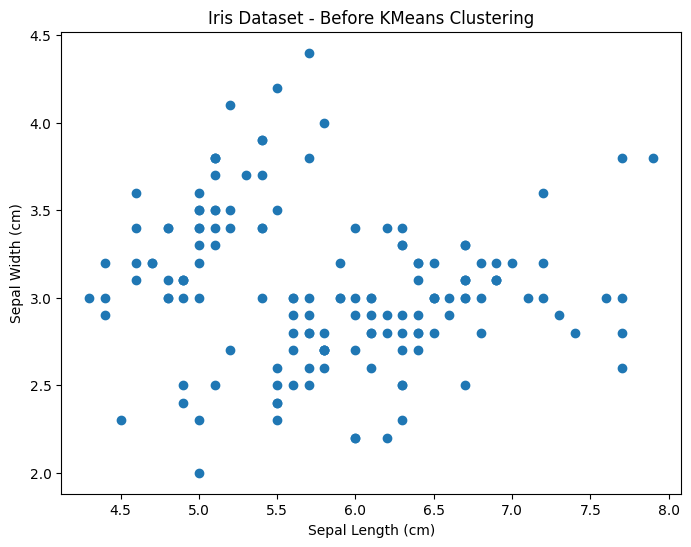

In [111]:

plt.figure(figsize=(8, 6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Before KMeans Clustering')
plt.show()


In [112]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [121]:
# List to hold the WCSS values for different K values
wcss = []

# Perform K-Means for a range of K values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=5, random_state=42)
    # kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


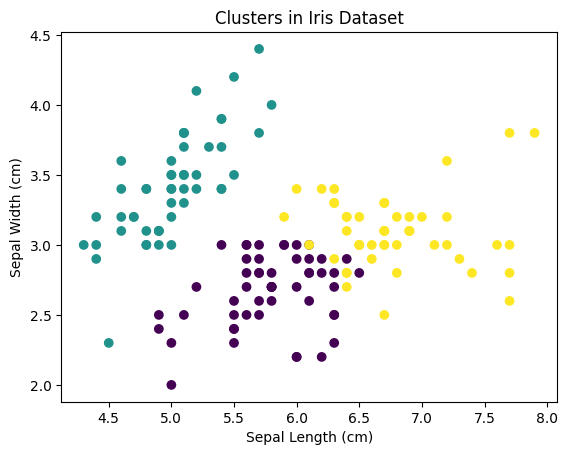

In [124]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

# Step 4: Visualize the clusters in a scatter plot
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Cluster'], cmap='viridis')
# plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clusters in Iris Dataset')
plt.show()


In [122]:
kmeans.labels_

array([5, 0, 0, 0, 5, 8, 5, 5, 0, 0, 5, 5, 0, 0, 8, 8, 8, 5, 8, 5, 5, 5,
       5, 5, 5, 0, 5, 5, 5, 0, 0, 5, 8, 8, 0, 0, 5, 0, 0, 5, 5, 3, 0, 5,
       5, 0, 5, 0, 5, 5, 2, 2, 2, 7, 2, 1, 2, 3, 2, 7, 3, 1, 7, 1, 1, 2,
       1, 7, 7, 7, 1, 1, 7, 1, 2, 2, 2, 2, 1, 7, 7, 7, 7, 1, 1, 1, 2, 7,
       1, 7, 7, 1, 7, 3, 7, 1, 1, 1, 3, 1, 9, 1, 4, 2, 9, 4, 7, 4, 2, 6,
       9, 2, 9, 7, 1, 9, 2, 6, 4, 7, 9, 1, 4, 2, 9, 4, 2, 1, 2, 4, 4, 6,
       2, 2, 1, 4, 9, 2, 1, 9, 9, 9, 1, 9, 9, 9, 2, 2, 9, 1], dtype=int32)

In [123]:
kmeans.cluster_centers_

array([[-1.37109761,  0.06560955, -1.33458232, -1.34391154],
       [ 0.02671907, -0.33856034,  0.48061727,  0.46190837],
       [ 0.810815  , -0.31779341,  0.69404592,  0.60981546],
       [-1.14301691, -1.74477836, -0.49965999, -0.41896053],
       [ 1.92656914, -0.30493769,  1.42619186,  1.03892863],
       [-0.92491474,  1.0690817 , -1.28213207, -1.21305727],
       [ 2.12851559,  1.57199748,  1.50201279,  1.360307  ],
       [-0.16729669, -1.33068884,  0.24797438,  0.12630631],
       [-0.3813903 ,  2.28824475, -1.30065404, -1.20028561],
       [ 0.94107046,  0.3069946 ,  1.00917669,  1.41289618]])